In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import Input
from keras.layers import MaxPooling1D
from keras import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import tensorflow as tf
import seaborn as sns

Data_Loading

In [11]:


#X = np.load("Prepared/Not_Writng_Not/Feature_N_W.npy",allow_pickle=True)
#Y = np.load("Prepared/Not_Writng_Not/Feature_N_W_Y.npy",allow_pickle=True)

#X_train, X_test, y_train , y_test  = train_test_split(X, Y, test_size = 0.30, random_state = 150, shuffle=True)

X_train = np.load("X_Train.npy",allow_pickle=True)
X_test = np.load("X_Test.npy",allow_pickle=True)
y_train = np.load("Y_Train.npy",allow_pickle=True)
y_test = np.load("Y_Test.npy",allow_pickle=True)

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')



In [19]:
#y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [20]:
y_test.shape

(3627, 2)

Model

In [13]:
model = Sequential()

model.add(LSTM(100,return_sequences=True, input_shape=(2,98)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(150,return_sequences=True))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(units = 2, activation='softmax'))


In [14]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Training

In [15]:
history = model.fit(X_train, y_train,epochs=75, batch_size=64)

Epoch 1/75
133/133 [==============================] - 10s 17ms/step - loss: 0.5729 - accuracy: 0.7017
Epoch 2/75
133/133 [==============================] - 2s 15ms/step - loss: 0.3541 - accuracy: 0.8345
Epoch 3/75
133/133 [==============================] - 2s 17ms/step - loss: 0.2791 - accuracy: 0.8828
Epoch 4/75
133/133 [==============================] - 3s 20ms/step - loss: 0.2363 - accuracy: 0.9024
Epoch 5/75
133/133 [==============================] - 3s 22ms/step - loss: 0.2286 - accuracy: 0.9098
Epoch 6/75
133/133 [==============================] - 3s 23ms/step - loss: 0.2080 - accuracy: 0.9136
Epoch 7/75
133/133 [==============================] - 3s 23ms/step - loss: 0.2038 - accuracy: 0.9169
Epoch 8/75
133/133 [==============================] - 3s 22ms/step - loss: 0.2021 - accuracy: 0.9178
Epoch 9/75
133/133 [==============================] - 3s 23ms/step - loss: 0.1848 - accuracy: 0.9201
Epoch 10/75
133/133 [==============================] - 3s 25ms/step - loss: 0.1780 - accur

Testing

In [21]:
model.evaluate(X_test,y_test)

114/114 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.9140


[0.4673093259334564, 0.9139785170555115]

In [22]:
preds = model.predict(X_test).argmax(1)

In [23]:
Y_test = y_test.argmax(1)   

In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy Score = ", accuracy_score(Y_test, preds))

Accuracy Score =  0.9139784946236559


Evaluation

In [25]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,8),
                           fontsize=14, normalize=True):
     
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt= fmt)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, preds)

cm

array([[2253,  171],
       [ 141, 1062]])

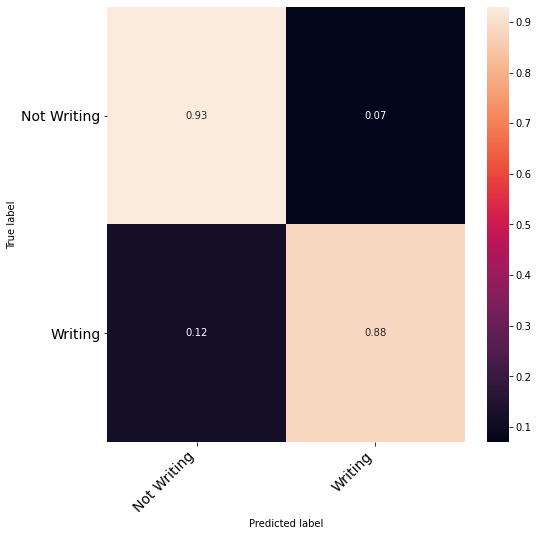

In [27]:
import seaborn as sns

class_names = ['Not Writing','Writing']
print_confusion_matrix(cm, class_names)
plt.savefig('Confusion_Matrix_LSTM(x,y).png', dpi=300)

In [28]:
report = classification_report(Y_test, preds,target_names=['Not_Writng', 'Writng'])
print(report)

              precision    recall  f1-score   support

  Not_Writng       0.94      0.93      0.94      2424
      Writng       0.86      0.88      0.87      1203

    accuracy                           0.91      3627
   macro avg       0.90      0.91      0.90      3627
weighted avg       0.91      0.91      0.91      3627



In [29]:
from collections import Counter


correct = [pred == true for pred, true in zip(preds, Y_test)]
correct = np.array(correct).flatten()
print(Counter(correct))

Counter({True: 3315, False: 312})


In [39]:
YY = np.array(Y_test).flatten()
classifiedIndexes = np.where(YY==preds)[0]
misclassifiedIndexes = np.where(YY!=preds)[0]

In [33]:
A = 2343
P = preds[A]
Y = Y_test[A]

Y

1

In [34]:
P

1

In [37]:
x_test = np.reshape(X_test,(3627,2,98))
X = x_test
XX = X[A]

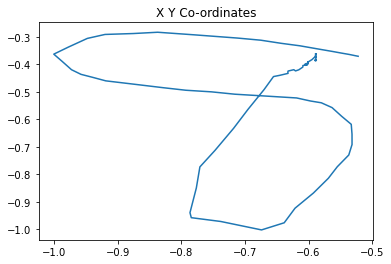

In [38]:
import matplotlib.pyplot as plt

x = XX[0]
y = XX[1]

plt.plot(x, y)
plt.title('X Y Co-ordinates')
plt.savefig("MC6.png")

plt.show()